In [50]:
import numpy as np
import cv2 as cv
import scipy.ndimage as scidi
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from scipy import spatial
#from sklearn import neighbors as KNN
#from sklearn import metrics as MLMets


np.set_printoptions(threshold=np.inf)
np.set_printoptions(linewidth=np.inf)

Sigma = 3
L1 = 289025.4540284134
L2 = 934.9793485504157
Cos = 0.9890754716651545
Sigma = 5
L1 = 412252.94239313866
L2 = 1365.006507723332
Cos = 0.9810252631767129
Sigma = 7
L1 = 510668.4553154158
L2 = 1688.3470490940942
Cos = 0.9738627155165889
Sigma = 9
L1 = 593829.7153532823
L2 = 2029.468413616597
Cos = 0.9671881499039948
Sigma = 11
L1 = 666552.6994403681
L2 = 2436.0642631152837
Cos = 0.9608629225361223
Sigma = 13
L1 = 729708.8563166608
L2 = 2837.5083280571275
Cos = 0.954936162783832
Sigma = 15
L1 = 784250.6168257402
L2 = 3208.807608586009
Cos = 0.9494656451707909
Sigma = 17
L1 = 831398.3881548257
L2 = 3544.2533243796183
Cos = 0.9444616987482651
Sigma = 19
L1 = 872217.2555920985
L2 = 3844.329295277034
Cos = 0.9398973166730052
Sigma = 21
L1 = 907791.2895740947
L2 = 4112.555488764302
Cos = 0.9357246136205835
Sigma = 23
L1 = 939158.4540095861
L2 = 4353.743191113906
Cos = 0.9318867392317078
Sigma = 25
L1 = 967243.7168583735
L2 = 4572.647434719775
Cos = 0.9283274212574237


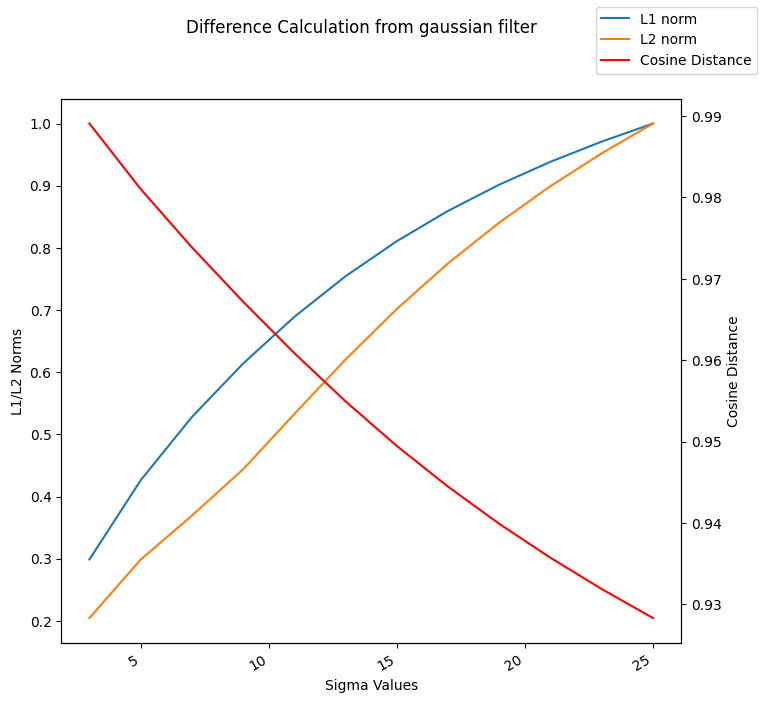

In [51]:
#Problem 2
# Write a code that takes an image, applies gaussian blur, and examines the impact of different gaussian blur on
# different Distance metrics




with Image.open(r"/Users/DavidChaparro/Desktop/Classes/ComputerVision/HW4SelfImage.jpg") as pic:
    pic = pic.resize((150,150))
    pic = ImageOps.grayscale(pic)
    S1 = scidi.gaussian_filter(pic,sigma = 3)
    Image.fromarray(S1).save("HW4Q2S3.jpg")
    S2 = scidi.gaussian_filter(pic,sigma = 7)
    Image.fromarray(S2).save("HW4Q2S7.jpg")
    S3 = scidi.gaussian_filter(pic,sigma = 11)
    Image.fromarray(S3).save("HW4Q2S11.jpg")
    pic = np.asarray(pic).astype('float64')

    X = []
    L1s = []
    L2s = []
    LCoss = []

    for i in range(3,27,2):
        S = scidi.gaussian_filter(pic,sigma = i)

        L1 = np.linalg.norm((S-pic).flatten(),ord = 1)
        L2 =  np.linalg.norm(S-pic,ord = 2)
        LCos = 1-spatial.distance.cosine( np.asarray(S).flatten(),np.asarray(pic).flatten())
        print("Sigma = %s" %i)
        print("L1 = %s" %L1)
        print("L2 = %s" %L2)
        print("Cos = %s" %LCos)


        X.append(i)
        L1s.append(L1)
        L2s.append(L2)
        LCoss.append(LCos)

    L1s /= max(L1s)
    L2s /= max(L2s)


    fig, ax1 = plt.subplots(figsize=(8, 8))
    ax2 = ax1.twinx()

    ax1.plot(X, L1s,label = "L1 norm" )
    ax1.plot(X, L2s, label = "L2 norm")
    ax2.plot(X, LCoss, label = "Cosine Distance", color = 'red')

    ax1.set_xlabel("Sigma Values")
    ax1.set_ylabel("L1/L2 Norms")
    ax1.tick_params(axis="y")
    #ax1.set_yscale('log')

    ax2.set_ylabel("Cosine Distance")
    ax2.tick_params(axis="y")

    fig.suptitle("Difference Calculation from gaussian filter")
    fig.legend()
    fig.autofmt_xdate()
    fig.savefig('HW4Q2.png')



In [68]:
#3 asks us to create a random noise photo
def Rescale(X):
    Min = np.min(X)
    Max = np.max(X)

    return (X)*255/Max

def G(X,d):
    N = abs(np.random.rand(X.shape[0],X.shape[1]))
    alpha = d/np.sum(N)
    Y = X+alpha*N
    Max = np.max(Y)

    return (Y)*255/Max


TestArray = np.asarray([[2,4],[1,3]])
NoiseAdded = G(TestArray,4)
np.linalg.norm((TestArray-NoiseAdded).flatten(),ord = 1)

#pic = Image.open(r"/Users/DavidChaparro/Desktop/Classes/ComputerVision/HW4SelfImage.jpg")
pic = cv.imread("/Users/DavidChaparro/Desktop/Classes/ComputerVision/HW4SelfImage.jpg")
pic = cv.cvtColor(pic,cv.COLOR_BGR2GRAY)
pic = cv.resize(pic,(150,150))
pic = np.asarray(pic).astype('float64')
S1 = G((np.asarray(pic)),10**4)
S2 = G(np.asarray(pic),10**6)
S3 = G(np.asarray(pic),10**7)

print(np.linalg.norm((S1-pic).flatten(),ord = 1))
print(np.linalg.norm((S2-pic).flatten(),ord = 1))
print(np.linalg.norm((S3-pic).flatten(),ord = 1))


cv.imwrite("HW4Q3a.jpg",pic)
cv.imwrite("HW4Q3b.jpg",S1)
cv.imwrite("HW4Q3c.jpg",S2)
cv.imwrite("HW4Q3d.jpg",S3)
#Image.fromarray(np.uint8(S1)).save("HW4Q3b.jpg")
#Image.fromarray(np.uint8(S2)).save("HW4Q3c.jpg")
#Image.fromarray(np.uint8(S3)).save("HW4Q3d.jpg")






61946.07850415972
467435.2351066514
1426276.733241398


True

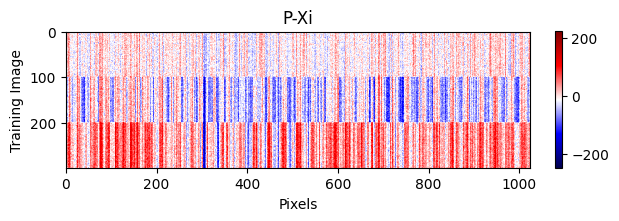

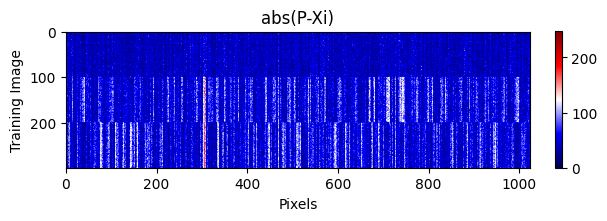

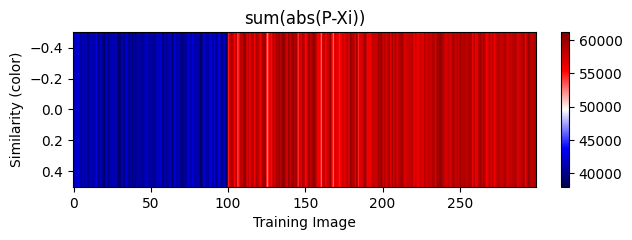

In [70]:
Me = cv.imread("/Users/DavidChaparro/Desktop/Classes/ComputerVision/HW4SelfImage.jpg")
dog =  cv.imread("/Users/DavidChaparro/Desktop/Classes/ComputerVision/dog.jpg")
cat =  cv.imread("/Users/DavidChaparro/Desktop/Classes/ComputerVision/cat.jpg")

Me = cv.cvtColor(Me,cv.COLOR_BGR2GRAY)
Me = cv.resize(Me,(32,32))
Me = np.asarray(Me).astype('float64')

dog = cv.cvtColor(dog,cv.COLOR_BGR2GRAY)
dog = cv.resize(dog,(32,32))
dog = np.asarray(dog).astype('float64')

cat = cv.cvtColor(cat,cv.COLOR_BGR2GRAY)
cat = cv.resize(cat,(32,32))
cat = np.asarray(cat).astype('float64')


TrainingDataset= []
TrainingLabels = []


Output1 = np.zeros((300,1024))
Output2 = np.zeros((300,1024))
Output3 = np.zeros((1,300))

Exp = 6

P = G(np.asarray(Me),10**Exp)
P = Rescale(P)

for i in range(100):
    j = i+100
    k = i+200

    M = G(np.asarray(Me),10**5)
    D = G(np.asarray(dog),10**5)
    C = G(np.asarray(cat),10**5)


    TrainingDataset.append(M.flatten())
    TrainingLabels.append(1)
    TrainingDataset.append(D.flatten())
    TrainingLabels.append(2)
    TrainingDataset.append(C.flatten())
    TrainingLabels.append(3)

    Output1[i,:] = P.flatten()-M.flatten()
    Output1[j,:] = P.flatten()-D.flatten()
    Output1[k,:] = P.flatten()-C.flatten()

    Output2[i,:] = np.abs(Output1[i,:])
    Output2[j,:] = np.abs(Output1[j,:])
    Output2[k,:] = np.abs(Output1[k,:])

    Output3[0,i] = sum(Output2[i,:])
    Output3[0,j] = sum(Output2[j,:])
    Output3[0,k] = sum(Output2[k,:])

im = plt.imshow(Output1,cmap = 'seismic')
plt.title("P-Xi")
plt.xlabel("Pixels")
plt.ylabel("Training Image")
plt.colorbar(fraction=0.047*300/1024)
plt.savefig("5aplot.png")
plt.show()

im = plt.imshow(Output2,cmap = 'seismic')
plt.title("abs(P-Xi)")
plt.xlabel("Pixels")
plt.ylabel("Training Image")
plt.colorbar(fraction=0.047*300/1024)
plt.savefig("5bplot.png")
plt.show()

im = plt.imshow(Output3,cmap = 'seismic',aspect = 100)
plt.title("sum(abs(P-Xi))")
plt.xlabel("Training Image")
plt.ylabel("Similarity (color)")
plt.colorbar(fraction=0.047*100/300)
plt.savefig("5cplot.png")
plt.show()






In [28]:
Me = cv.imread("/Users/DavidChaparro/Desktop/Classes/ComputerVision/HW4SelfImage.jpg")
dog =  cv.imread("/Users/DavidChaparro/Desktop/Classes/ComputerVision/dog.jpg")
cat =  cv.imread("/Users/DavidChaparro/Desktop/Classes/ComputerVision/cat.jpg")

Me = cv.cvtColor(Me,cv.COLOR_BGR2GRAY)
Me = cv.resize(Me,(32,32))
Me = np.asarray(Me).astype('float64')

dog = cv.cvtColor(dog,cv.COLOR_BGR2GRAY)
dog = cv.resize(dog,(32,32))
dog = np.asarray(dog).astype('float64')

cat = cv.cvtColor(cat,cv.COLOR_BGR2GRAY)
cat = cv.resize(cat,(32,32))
cat = np.asarray(cat).astype('float64')

TestSet = []
TestLabel = []
ConfusionMatrix = np.zeros((3,3))

for k in range(5,8,1):
    for i in range(10):
        TestSet.append(G(Me,10**k).flatten())
        TestLabel.append(1)
        TestSet.append(G(dog,10**k).flatten())
        TestLabel.append(2)
        TestSet.append(G(cat,10**k).flatten())
        TestLabel.append(3)


TrainingDataset = np.asarray(TrainingDataset)
TestSet = np.asarray(TestSet)



KNNClassifier = KNN.KNeighborsClassifier(n_neighbors= 3,weights='distance',metric = 'l1')
KNNClassifier.fit(TrainingDataset,TrainingLabels)
Predictions = KNNClassifier.predict(TestSet)
ConfusionMatrix = MLMets.confusion_matrix(TestLabel,Predictions)
Accuracy = MLMets.accuracy_score(TestLabel,Predictions)
print(ConfusionMatrix)
print(Accuracy)




[[10 20  0]
 [ 0 30  0]
 [ 0 20 10]]
0.5555555555555556


[[0.33333333 0.33333333 0.33333333 0.33333333 1.         0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333 0.33333333 1.         0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333 0.33333333 1.         0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]]


Text(0.5, 1.0, 'Accuracy as a function of random noise added')

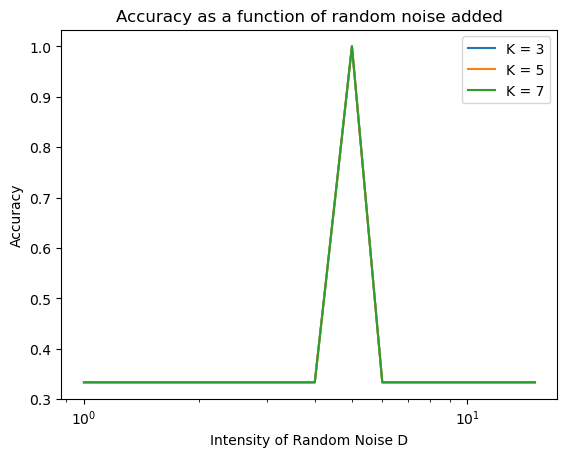

In [36]:
#Question 7: 

AccuracyMatrix = np.zeros((3,15))
BIGD = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for yindex,d in enumerate(BIGD):
    for xindex,k in enumerate([3,5,7]):
        TempTestSet = []
        TempTestLabels = []
        for i in range(50): #Generate Testing Dataset
            TempTestSet.append(G(Me,10**d).flatten())
            TempTestLabels.append(1)
            TempTestSet.append(G(dog,10**d).flatten())
            TempTestLabels.append(2)
            TempTestSet.append(G(cat,10**d).flatten())
            TempTestLabels.append(3)


        ExperimentalClassifier = KNN.KNeighborsClassifier(n_neighbors= k,weights='distance',metric = 'l1')
        ExperimentalClassifier.fit(TrainingDataset,TrainingLabels)
        ExperimentalPredictions = ExperimentalClassifier.predict(TempTestSet)
        ExperimentalAccuracy = MLMets.accuracy_score(TempTestLabels,ExperimentalPredictions)
        AccuracyMatrix[xindex,yindex] = ExperimentalAccuracy

print(AccuracyMatrix)
plt.plot(BIGD,AccuracyMatrix[0,:],label = "K = 3")
plt.plot(BIGD,AccuracyMatrix[1,:],label = "K = 5")
plt.plot(BIGD,AccuracyMatrix[2,:],label = "K = 7")
plt.legend()
plt.xlabel("Intensity of Random Noise D")
plt.xscale('log')
plt.ylabel("Accuracy")
plt.title("Accuracy as a function of random noise added")
plt.savefig("HW4Q7.png")
plt.show()

